In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.IntervalData import IntervalData
from interClusLib.metric import *
from interClusLib.clustering.IntervalKMeans import IntervalKMeans
from interClusLib.visualization.IntervalParallelCoordinates import IntervalParallelCoordinates
from interClusLib.visualization.IntervalRadarChart import IntervalRadarChart

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(60, 7)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         36.393929        80.834911        12.794137        60.285938   
1         12.445515        63.987882        20.871485        95.117921   
2         63.699034        65.523951        39.866822        40.524777   
3         24.012893        28.875857        22.363290        99.007818   
4         50.972608        93.299143        29.756160        92.109496   
5          1.137739        34.412038        29.269881        34.460598   
6         45.548481        91.061637         5.692372        49.421902   
7          8.285147        20.880676        65.339885        78.807437   
8         84.698913        84.957694        41.507735        60.339719   
9         28.742313        39.756375        37.362093        89.154413   
10        63.584817        86.080105        23.528973        35.735

In [2]:
model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

print(model.labels_)

[0 1 3 0 2 1 3 1 0 1 3 3 0 0 3 0 0 2 2 1 2 1 2 3 1 1 3 0 0 3 0 3 3 3 3 1 2
 3 0 0 2 2 3 1 0 3 2 3 1 1 1 0 3 3 0 0 1 0 1 1]


<Figure size 1500x800 with 0 Axes>

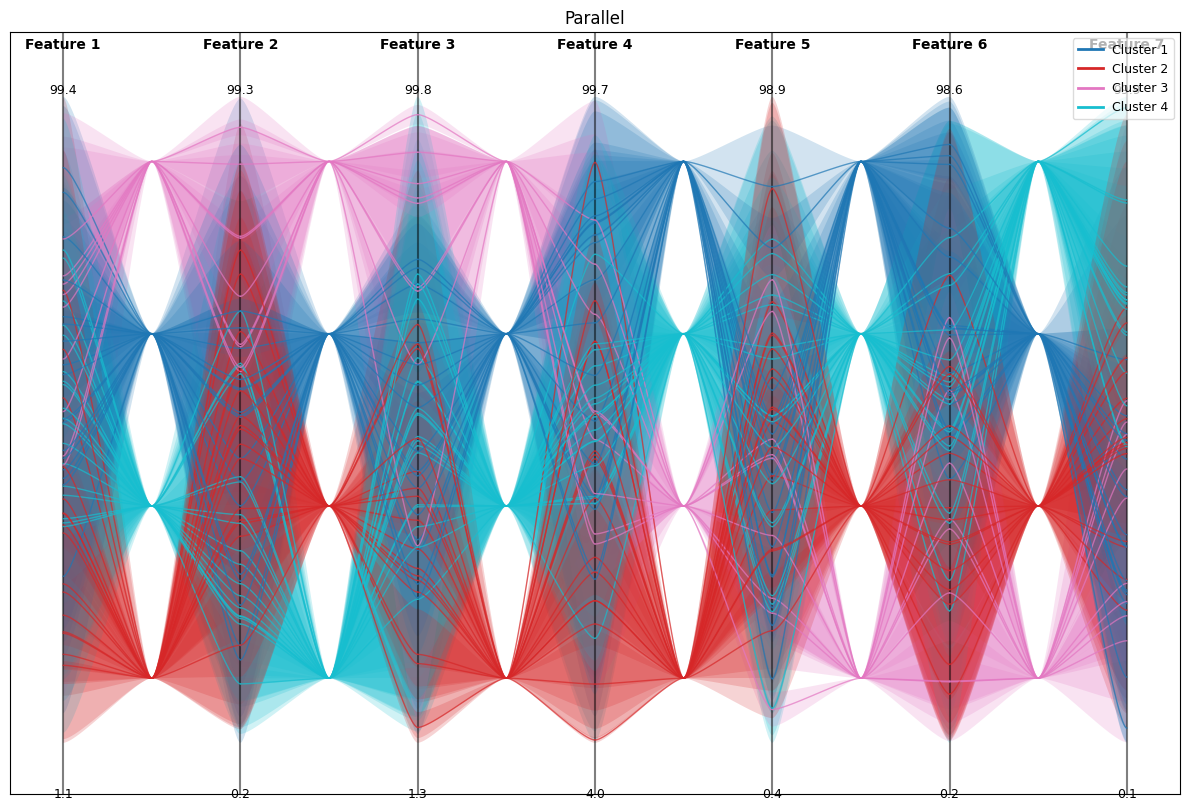

In [3]:
plt.figure(figsize=(15, 8))
IntervalParallelCoordinates.plot_interval_curves(data = random_data.get_intervals(), feature_names= None, clusters=model.labels_, beta = 1)
plt.title("Parallel")
plt.show()

<Figure size 1500x800 with 0 Axes>

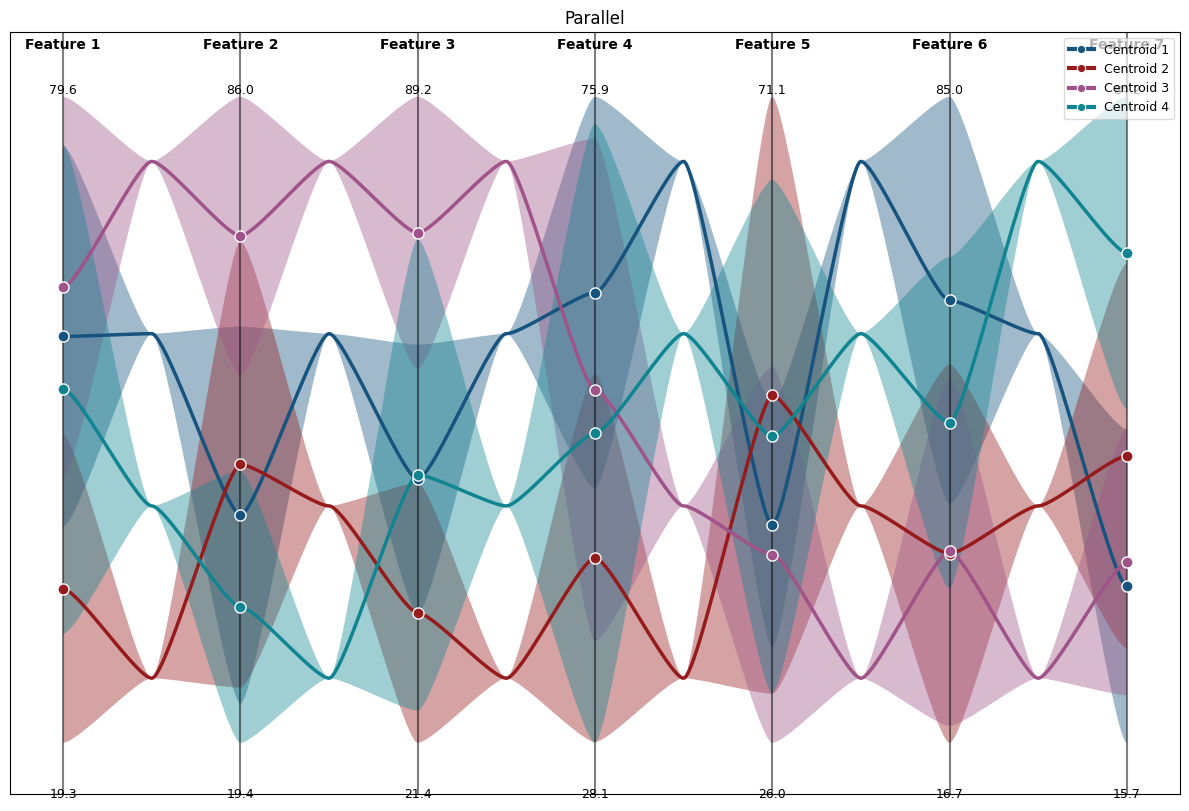

In [4]:
plt.figure(figsize=(15, 8))
IntervalParallelCoordinates.plot_interval_curves(data = None, feature_names= None, clusters=model.labels_, centroids = model.centroids_, beta = 1)
plt.title("Parallel")
plt.show()

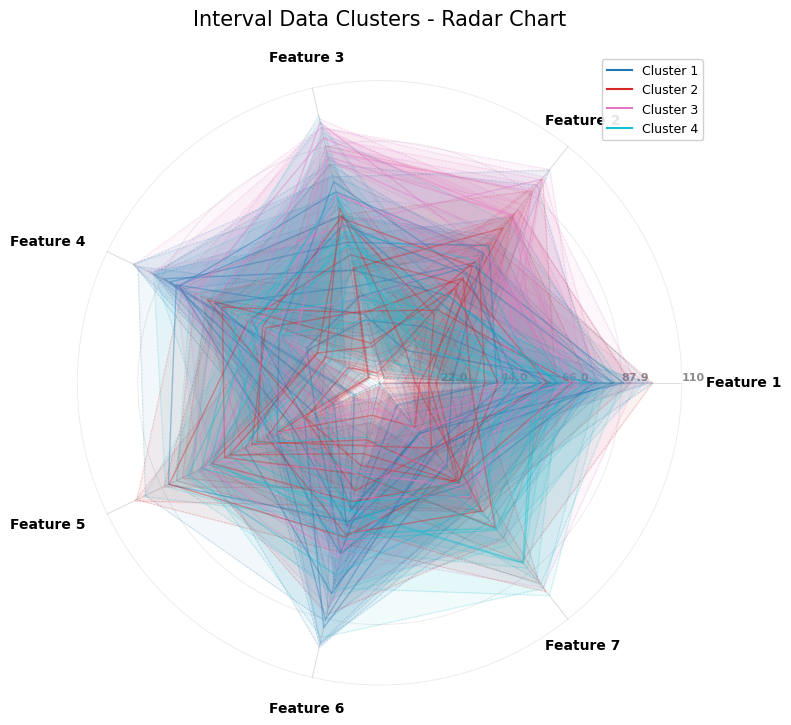

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

IntervalRadarChart.plot_interval_radar(
        data=random_data.get_intervals(), 
        feature_names=None, 
        clusters=model.labels_, 
        centroids=None, 
        ax=ax, 
        use_color=True,
        uncertainty_alpha=0.15
    )
    
plt.title('Interval Data Clusters - Radar Chart', size=15, pad=20)
plt.tight_layout()
plt.show()

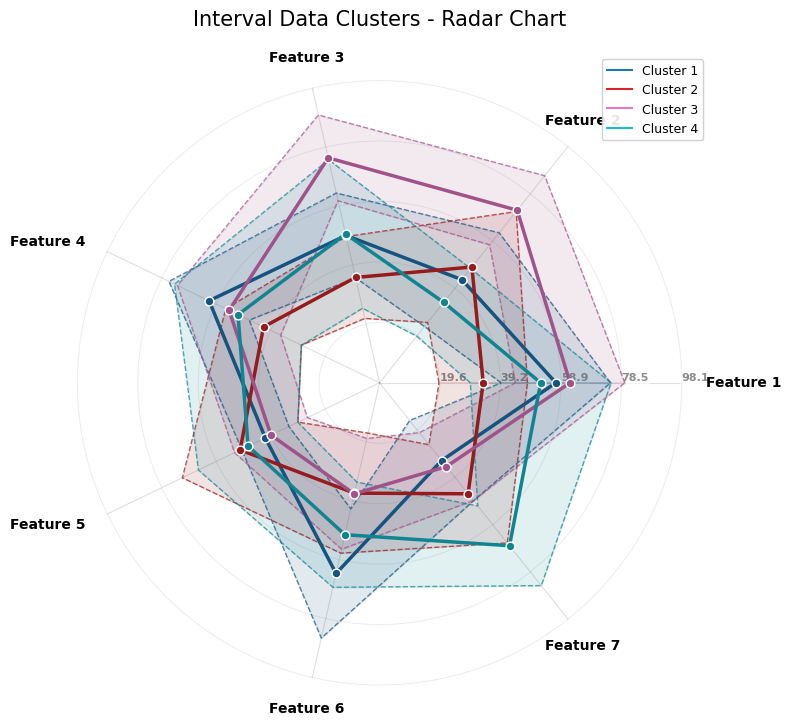

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

IntervalRadarChart.plot_interval_radar(
        data=None, 
        feature_names=None, 
        clusters=model.labels_, 
        centroids=model.centroids_, 
        ax=ax, 
        use_color=True,
        uncertainty_alpha=0.15
    )
    
plt.title('Interval Data Clusters - Radar Chart', size=15, pad=20)
plt.tight_layout()
plt.show()